<a href="https://colab.research.google.com/github/mars241/Machine-Learning/blob/main/2023_04_03_Cours_R%C3%A9cap_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification challenge

Your goal are :
- to merge both 2018 DataFrames
- to train-test split the new 2018 DataFrame
- to train a Logistic Regression model
- to try different parameters
- to find the best accuracy score (on the test set of course)
- to fill the missing values in the "opinion" columns whith your best model
- to explain what is the "rules" used by your model to predict the opinion.

You can help yourself with charts if you want.

In [ ]:
import pandas as pd
import numpy as np
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
df_opinion = df_opinion.rename(columns={'date':'DATE'})
df2018 = pd.merge(df_main,
                  df_opinion,
                  how ='outer',
                  on='DATE')
df2018.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,bad
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,bad
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,122.0,0.0,3.0,3.3,bad
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,116.0,0.0,3.0,3.3,bad
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,116.0,0.0,3.0,6.9,bad


In [ ]:
df2018.isna().sum()

DATE                       0
MAX_TEMPERATURE_C          0
MIN_TEMPERATURE_C          0
WINDSPEED_MAX_KMH          0
TEMPERATURE_MORNING_C      0
TEMPERATURE_NOON_C         0
TEMPERATURE_EVENING_C      0
PRECIP_TOTAL_DAY_MM        0
HUMIDITY_MAX_PERCENT       0
VISIBILITY_AVG_KM          0
PRESSURE_MAX_MB            0
CLOUDCOVER_AVG_PERCENT     0
HEATINDEX_MAX_C            0
DEWPOINT_MAX_C             0
WINDTEMP_MAX_C             0
WEATHER_CODE_EVENING      24
TOTAL_SNOW_MM             24
UV_INDEX                  24
SUNHOUR                   24
OPINION                   24
dtype: int64

On a désormais des valeurs manquantes. Pour la colonne OPINION, il s'agit de valeurs à prédire: 24 au total, donc 24 mois  
Pour les autres colonnes, il faut traiter les valeurs manquantes.  
C'est parti !!

## 1.2 Traitement des valeurs manquantes

In [ ]:
df2018[df2018["UV_INDEX"].isna()]

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
18,2018-01-19,10,6,23,6,10,6,0.7,88,9.875,1020,37.000,10,6,5,NaN,NaN,NaN,NaN,NaN
31,2018-02-01,8,3,17,4,8,4,0.2,81,10.000,1012,39.500,8,3,2,NaN,NaN,NaN,NaN,NaN
66,2018-03-08,13,7,23,7,12,9,0.4,87,9.750,1005,52.625,13,7,6,NaN,NaN,NaN,NaN,NaN
100,2018-04-11,15,7,14,7,15,12,1.2,87,7.875,1002,59.125,15,10,10,NaN,NaN,NaN,NaN,NaN
118,2018-04-29,10,7,23,8,10,8,0.7,93,9.000,1008,85.000,10,9,7,NaN,NaN,NaN,NaN,NaN
143,2018-05-24,23,12,8,14,22,21,1.4,81,7.875,1018,27.250,25,17,19,NaN,NaN,NaN,NaN,NaN
152,2018-06-02,23,12,5,15,23,21,1.0,75,9.875,1021,24.750,25,18,20,NaN,NaN,NaN,NaN,NaN
163,2018-06-13,20,12,10,13,20,19,0.3,72,9.000,1020,36.875,21,16,18,NaN,NaN,NaN,NaN,NaN
165,2018-06-15,19,13,16,14,19,18,0.1,85,8.000,1019,61.625,19,15,16,NaN,NaN,NaN,NaN,NaN
175,2018-06-25,25,13,22,15,24,24,0.0,71,10.000,1023,4.750,26,19,20,NaN,NaN,NaN,NaN,NaN


### Quelle stratégie pour remplacer les nan la colonne `['WEATHER_CODE_EVENING']` ?

In [ ]:
df2018['WEATHER_CODE_EVENING'].fillna(method = "bfill", inplace = True)
df2018['WEATHER_CODE_EVENING'].value_counts()

113.0    164
116.0     82
122.0     64
119.0     38
143.0     13
200.0      2
248.0      1
353.0      1
Name: WEATHER_CODE_EVENING, dtype: int64

### Quelle stratégie pour remplacer les nan la colonne `['TOTAL_SNOW_MM']` ?

In [ ]:
df2018['TOTAL_SNOW_MM'].value_counts(dropna=False)

0.0    341
NaN     24
Name: TOTAL_SNOW_MM, dtype: int64

In [ ]:
#Il ne neige jamais, on peut supprimer cette colonne.
df2018 = df2018.drop(columns='TOTAL_SNOW_MM')

### Quelle stratégie pour remplacer les nan la colonne `['UV_INDEX']` ?






In [ ]:
df2018['UV_INDEX'].fillna(method = "bfill", inplace = True)
df2018['UV_INDEX'].value_counts(dropna = False)

1.0    282
3.0     31
4.0     27
2.0     14
5.0     11
Name: UV_INDEX, dtype: int64

### Quelle stratégie pour remplacer les nan la colonne `[SUNHOUR]` ?

In [ ]:
df2018['SUNHOUR'].fillna(method = "bfill", inplace = True)

In [ ]:
df2018.isna().sum()

DATE                       0
MAX_TEMPERATURE_C          0
MIN_TEMPERATURE_C          0
WINDSPEED_MAX_KMH          0
TEMPERATURE_MORNING_C      0
TEMPERATURE_NOON_C         0
TEMPERATURE_EVENING_C      0
PRECIP_TOTAL_DAY_MM        0
HUMIDITY_MAX_PERCENT       0
VISIBILITY_AVG_KM          0
PRESSURE_MAX_MB            0
CLOUDCOVER_AVG_PERCENT     0
HEATINDEX_MAX_C            0
DEWPOINT_MAX_C             0
WINDTEMP_MAX_C             0
WEATHER_CODE_EVENING       0
UV_INDEX                   0
SUNHOUR                    0
OPINION                   24
dtype: int64

#### L'étape du traitement des valeurs manquantes est maintenant terminé.

# 2 - Train Test Split

In [ ]:
df2018

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,3.0,5.1,bad
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,122.0,3.0,3.3,bad
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,122.0,3.0,3.3,bad
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,116.0,3.0,3.3,bad
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,116.0,3.0,6.9,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,1027,30.750,8,6,3,119.0,1.0,8.7,very bad
361,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,1035,18.750,8,4,4,113.0,1.0,8.7,very bad
362,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,1038,33.000,8,5,1,116.0,1.0,8.7,very bad
363,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,1038,70.375,10,9,7,143.0,1.0,3.3,very bad


Avant de faire le train_test_split, on va mettre de côté les données qui ont des valeurs manquantes pour la colonne "OPINION". On fera des prédictions pour ces 24 lignes, avec le modèle le plus optimisé pour ce dataset.

In [ ]:
df_nan = df2018[df2018["OPINION"].isna()]

In [ ]:
df = df2018[~df2018["OPINION"].isna()]
df.isna().sum()

DATE                      0
MAX_TEMPERATURE_C         0
MIN_TEMPERATURE_C         0
WINDSPEED_MAX_KMH         0
TEMPERATURE_MORNING_C     0
TEMPERATURE_NOON_C        0
TEMPERATURE_EVENING_C     0
PRECIP_TOTAL_DAY_MM       0
HUMIDITY_MAX_PERCENT      0
VISIBILITY_AVG_KM         0
PRESSURE_MAX_MB           0
CLOUDCOVER_AVG_PERCENT    0
HEATINDEX_MAX_C           0
DEWPOINT_MAX_C            0
WINDTEMP_MAX_C            0
WEATHER_CODE_EVENING      0
UV_INDEX                  0
SUNHOUR                   0
OPINION                   0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['DATE', 'OPINION'])
y = df['OPINION']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2, train_size = 0.7)

Avant de passer à l'entraînement d'algorithmes, posons nous la question:  "Est-il facile, ici, d'avoir un bon score?"

In [ ]:
df["OPINION"].value_counts()

good                91
very bad            82
bad                 79
not good not bad    68
very good           21
Name: OPINION, dtype: int64

Il s'agit d'un cas de multiclassification, avec 5 classes à prédire.  
Il est donc ici difficile d'avoir un bon score, sachant que nous n'avons pas beaucoup de données...

In [ ]:
df["OPINION"].value_counts().values[0]

91

Un modèle "bête" prédirait à chaque fois la valeur la plus représenté, donc good. Il est donc simple d'avoir 26,6% d'accuracy.  
Essayons de faire mieux.

In [ ]:
df["OPINION"].value_counts().values[0] / df.shape[0]

0.2668621700879765

# Entraînement de l'algorithme Logistic Regression :

In [ ]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(max_iter = 100000000).fit(X_train, y_train)

# modelLR = LogisticRegression()
# modelLR.fit(X_train, y_train)

In [ ]:
print('accuracy score on train set :',modelLR.score(X_train, y_train))
print('accuracy score on test set :',modelLR.score(X_test, y_test))

accuracy score on train set : 0.907563025210084
accuracy score on test set : 0.7669902912621359


In [ ]:
confusion_matrix(y_true = y_test, y_pred = modelLR.predict(X_test))

array([[20,  0,  3,  2,  0],
       [ 0, 23,  6,  0,  0],
       [ 2,  2, 13,  0,  0],
       [ 3,  0,  1, 19,  0],
       [ 0,  5,  0,  0,  4]])

In [ ]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = modelLR.predict(X_test)),
             index = modelLR.classes_ + " ACTUAL",
             columns = modelLR.classes_ + " PREDICTED")

,bad PREDICTED,good PREDICTED,not good not bad PREDICTED,very bad PREDICTED,very good PREDICTED
bad ACTUAL,20,0,3,2,0
good ACTUAL,0,23,6,0,0
not good not bad ACTUAL,2,2,13,0,0
very bad ACTUAL,3,0,1,19,0
very good ACTUAL,0,5,0,0,4


# Prédictions

On a notre meilleur modèle. On va l'utiliser pour prédire les valeurs manquantes de la colonne "OPINION".

In [ ]:
df_nan

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,UV_INDEX,SUNHOUR,OPINION
18,2018-01-19,10,6,23,6,10,6,0.7,88,9.875,1020,37.000,10,6,5,122.0,1.0,3.4,NaN
31,2018-02-01,8,3,17,4,8,4,0.2,81,10.000,1012,39.500,8,3,2,113.0,1.0,9.8,NaN
66,2018-03-08,13,7,23,7,12,9,0.4,87,9.750,1005,52.625,13,7,6,116.0,3.0,10.2,NaN
100,2018-04-11,15,7,14,7,15,12,1.2,87,7.875,1002,59.125,15,10,10,122.0,1.0,7.9,NaN
118,2018-04-29,10,7,23,8,10,8,0.7,93,9.000,1008,85.000,10,9,7,122.0,1.0,9.2,NaN
143,2018-05-24,23,12,8,14,22,21,1.4,81,7.875,1018,27.250,25,17,19,116.0,4.0,11.5,NaN
152,2018-06-02,23,12,5,15,23,21,1.0,75,9.875,1021,24.750,25,18,20,119.0,1.0,11.6,NaN
163,2018-06-13,20,12,10,13,20,19,0.3,72,9.000,1020,36.875,21,16,18,122.0,1.0,12.9,NaN
165,2018-06-15,19,13,16,14,19,18,0.1,85,8.000,1019,61.625,19,15,16,119.0,1.0,14.7,NaN
175,2018-06-25,25,13,22,15,24,24,0.0,71,10.000,1023,4.750,26,19,20,113.0,1.0,16.0,NaN


In [ ]:
nan_to_predict = df_nan.drop(columns = ["DATE", "OPINION"])
nan_to_predict

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,UV_INDEX,SUNHOUR
18,10,6,23,6,10,6,0.7,88,9.875,1020,37.000,10,6,5,122.0,1.0,3.4
31,8,3,17,4,8,4,0.2,81,10.000,1012,39.500,8,3,2,113.0,1.0,9.8
66,13,7,23,7,12,9,0.4,87,9.750,1005,52.625,13,7,6,116.0,3.0,10.2
100,15,7,14,7,15,12,1.2,87,7.875,1002,59.125,15,10,10,122.0,1.0,7.9
118,10,7,23,8,10,8,0.7,93,9.000,1008,85.000,10,9,7,122.0,1.0,9.2
143,23,12,8,14,22,21,1.4,81,7.875,1018,27.250,25,17,19,116.0,4.0,11.5
152,23,12,5,15,23,21,1.0,75,9.875,1021,24.750,25,18,20,119.0,1.0,11.6
163,20,12,10,13,20,19,0.3,72,9.000,1020,36.875,21,16,18,122.0,1.0,12.9
165,19,13,16,14,19,18,0.1,85,8.000,1019,61.625,19,15,16,119.0,1.0,14.7
175,25,13,22,15,24,24,0.0,71,10.000,1023,4.750,26,19,20,113.0,1.0,16.0


In [ ]:
y_pred = modelLR.predict(nan_to_predict)

y_pred

array(['very bad', 'very bad', 'bad', 'not good not bad', 'bad', 'good',
       'not good not bad', 'not good not bad', 'not good not bad', 'good',
       'good', 'good', 'good', 'not good not bad', 'good',
       'not good not bad', 'not good not bad', 'not good not bad', 'good',
       'not good not bad', 'very bad', 'very bad', 'very bad',
       'not good not bad'], dtype=object)

In [ ]:
df_nan["OPINION"] = y_pred
df_nan

<ipython-input-28-a617c2aa7038>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan["OPINION"] = y_pred


,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,UV_INDEX,SUNHOUR,OPINION
18,2018-01-19,10,6,23,6,10,6,0.7,88,9.875,1020,37.000,10,6,5,122.0,1.0,3.4,very bad
31,2018-02-01,8,3,17,4,8,4,0.2,81,10.000,1012,39.500,8,3,2,113.0,1.0,9.8,very bad
66,2018-03-08,13,7,23,7,12,9,0.4,87,9.750,1005,52.625,13,7,6,116.0,3.0,10.2,bad
100,2018-04-11,15,7,14,7,15,12,1.2,87,7.875,1002,59.125,15,10,10,122.0,1.0,7.9,not good not bad
118,2018-04-29,10,7,23,8,10,8,0.7,93,9.000,1008,85.000,10,9,7,122.0,1.0,9.2,bad
143,2018-05-24,23,12,8,14,22,21,1.4,81,7.875,1018,27.250,25,17,19,116.0,4.0,11.5,good
152,2018-06-02,23,12,5,15,23,21,1.0,75,9.875,1021,24.750,25,18,20,119.0,1.0,11.6,not good not bad
163,2018-06-13,20,12,10,13,20,19,0.3,72,9.000,1020,36.875,21,16,18,122.0,1.0,12.9,not good not bad
165,2018-06-15,19,13,16,14,19,18,0.1,85,8.000,1019,61.625,19,15,16,119.0,1.0,14.7,not good not bad
175,2018-06-25,25,13,22,15,24,24,0.0,71,10.000,1023,4.750,26,19,20,113.0,1.0,16.0,good


In [ ]:
df_nan["Flag"] = 'predict'

df_nan

<ipython-input-29-f1e0bf9947ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan["Flag"] = 'predict'


,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,UV_INDEX,SUNHOUR,OPINION,Flag
18,2018-01-19,10,6,23,6,10,6,0.7,88,9.875,1020,37.000,10,6,5,122.0,1.0,3.4,very bad,predict
31,2018-02-01,8,3,17,4,8,4,0.2,81,10.000,1012,39.500,8,3,2,113.0,1.0,9.8,very bad,predict
66,2018-03-08,13,7,23,7,12,9,0.4,87,9.750,1005,52.625,13,7,6,116.0,3.0,10.2,bad,predict
100,2018-04-11,15,7,14,7,15,12,1.2,87,7.875,1002,59.125,15,10,10,122.0,1.0,7.9,not good not bad,predict
118,2018-04-29,10,7,23,8,10,8,0.7,93,9.000,1008,85.000,10,9,7,122.0,1.0,9.2,bad,predict
143,2018-05-24,23,12,8,14,22,21,1.4,81,7.875,1018,27.250,25,17,19,116.0,4.0,11.5,good,predict
152,2018-06-02,23,12,5,15,23,21,1.0,75,9.875,1021,24.750,25,18,20,119.0,1.0,11.6,not good not bad,predict
163,2018-06-13,20,12,10,13,20,19,0.3,72,9.000,1020,36.875,21,16,18,122.0,1.0,12.9,not good not bad,predict
165,2018-06-15,19,13,16,14,19,18,0.1,85,8.000,1019,61.625,19,15,16,119.0,1.0,14.7,not good not bad,predict
175,2018-06-25,25,13,22,15,24,24,0.0,71,10.000,1023,4.750,26,19,20,113.0,1.0,16.0,good,predict


In [ ]:
df["Flag"] = "no_predict"

df

<ipython-input-30-9c59d445e383>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Flag"] = "no_predict"


,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,UV_INDEX,SUNHOUR,OPINION,Flag
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,3.0,5.1,bad,no_predict
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,122.0,3.0,3.3,bad,no_predict
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,122.0,3.0,3.3,bad,no_predict
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,116.0,3.0,3.3,bad,no_predict
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,116.0,3.0,6.9,bad,no_predict
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,1027,30.750,8,6,3,119.0,1.0,8.7,very bad,no_predict
361,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,1035,18.750,8,4,4,113.0,1.0,8.7,very bad,no_predict
362,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,1038,33.000,8,5,1,116.0,1.0,8.7,very bad,no_predict
363,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,1038,70.375,10,9,7,143.0,1.0,3.3,very bad,no_predict


In [ ]:
df = pd.concat([df, df_nan])
df

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,UV_INDEX,SUNHOUR,OPINION,Flag
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,3.0,5.1,bad,no_predict
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,122.0,3.0,3.3,bad,no_predict
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,122.0,3.0,3.3,bad,no_predict
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,116.0,3.0,3.3,bad,no_predict
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,116.0,3.0,6.9,bad,no_predict
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,2018-11-14,15,7,16,7,15,12,0.0,83,9.000,1027,22.000,16,13,8,113.0,1.0,8.7,not good not bad,predict
321,2018-11-18,9,4,27,4,9,6,0.0,77,10.000,1018,0.375,9,3,1,113.0,1.0,8.7,very bad,predict
325,2018-11-22,12,2,16,3,10,8,0.8,90,9.625,1014,44.500,12,8,2,143.0,1.0,3.4,very bad,predict
346,2018-12-13,3,2,23,3,3,2,1.4,86,8.875,1014,88.875,3,1,-3,119.0,1.0,8.7,very bad,predict


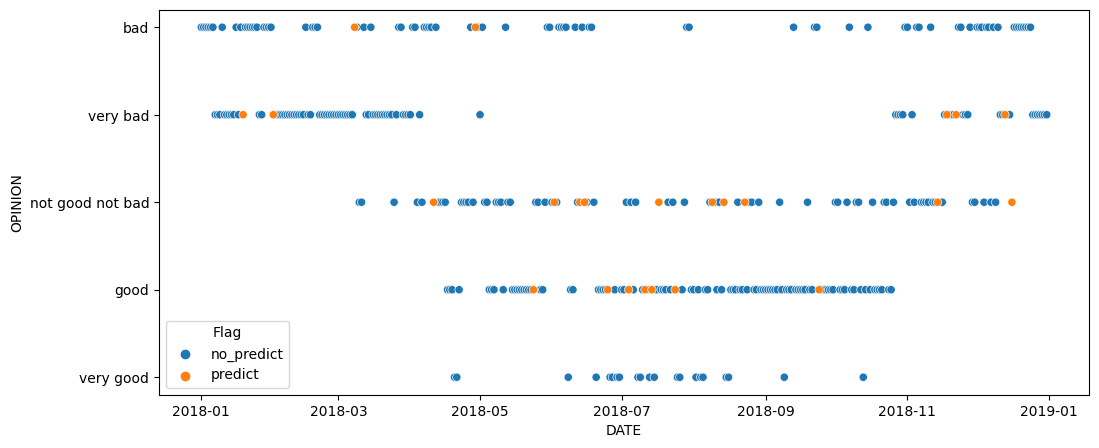

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12,5))

#convertir 'DATE' en datetime
df["DATE"] = pd.to_datetime(df["DATE"])

sns.scatterplot(data = df,
                x = "DATE",
                y = "OPINION",
                hue = "Flag");